In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
properties = pd.read_csv("./FinalDataset2.csv")
properties = properties.drop("Unnamed: 0", axis=1)
properties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,metro_long,park_lat,park_long,parking_lat,parking_long,parking_cost,price,population,violent_crime_rate,property_crime_rate
0,https://www.realtor.com/rentals/details/1000-Q...,9388507782,2977613306,ZILL,3tbhj3u37w4g5,FOR_RENT,NaN,APARTMENT,1000 Queen Anne Ave N,1000 Queen Anne Ave,...,-122.33722,47.629656,-122.355466,47.625777,47.625777,10.00,1370.0,21398,0.003209,0.070708
1,https://www.realtor.com/rentals/details/1800-4...,2045697942,2977600988,RENU,r3813091,FOR_RENT,"For interested prospects, please provide a mob...",TOWNHOMES,1800 43rd Ave E Apt 301,1800 43rd Ave,...,-122.30380,47.635779,-122.276602,47.623296,47.623296,7.00,2750.0,20898,0.006484,0.041116
2,https://www.realtor.com/rentals/details/2111-W...,2796743275,2977598979,ZUMU,60419377,FOR_RENT,"For interested prospects, please provide a mob...",CONDOS,2111 Waverly Pl N Apt 201,2111 Waverly Pl,...,-122.33722,47.640523,-122.344468,47.638869,47.638869,1.17,2800.0,21398,0.003209,0.070708
3,https://www.realtor.com/rentals/details/626-4t...,1189690439,2977587231,SEWA,2326148,FOR_RENT,Special Temporary reduced Rent for 12 months! ...,CONDOS,626 4th Ave W Apt 201,626 4th Ave,...,-122.33722,47.626809,-122.364152,47.625174,47.625174,18.72,1595.0,20320,0.005610,0.118159
4,https://www.realtor.com/rentals/details/3227-1...,9156930040,2977591809,RLXB,ce741b5a-2101-11ee-abe0-06771900a607,FOR_RENT,NaN,APARTMENT,3227 14th Ave W,3227 14th Ave,...,-122.33722,47.647239,-122.379191,47.664825,47.664825,6.00,1995.0,20320,0.005610,0.118159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,https://www.realtor.com/rentals/details/165-17...,1396043702,2966261121,RLXB,890a70c2-58a1-11ee-80f0-02dcc31ee659,FOR_RENT,NaN,APARTMENT,165 17th Ave,165 17th Ave,...,-122.32806,47.601407,-122.307257,47.606118,47.606118,0.25,2175.0,31199,0.005609,0.046003
1723,https://www.realtor.com/rentals/details/2418-N...,9761418095,2966245973,RLXB,b88b3ea6-69de-11ee-8ab6-12de4bf481cd,FOR_RENT,NaN,APARTMENT,2418 NW 57th St,2418 NW 57th St,...,-122.32806,47.670549,-122.385487,47.670550,47.670550,1.00,1295.0,21826,0.003238,0.053255
1724,https://www.realtor.com/rentals/details/603-12...,2785018075,2966268560,RLXB,5b0c80e0-9466-11e8-ba21-1866dab9098f,FOR_RENT,NaN,APARTMENT,603 12th Ave E,603 12th Ave,...,-122.32028,47.619809,-122.313094,47.624205,47.624205,4.00,1595.0,22603,0.007418,0.047368
1725,https://www.realtor.com/rentals/details/1510-2...,2814816034,2966252971,RLXB,620a7610-99b7-11ec-9463-061468efe32a,FOR_RENT,Available now is a room for rent with a privat...,APARTMENT,1510 23rd Ave,1510 23rd Ave,...,-122.32028,47.617309,-122.300994,47.608086,47.608086,3.58,875.0,31199,0.005609,0.046003


In [4]:
cols = ['style', 'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls', 'lot_sqft', 'stories', 'parking_garage', 'Property Crime', 'Violent Crime', 'price']

In [5]:
dataset = properties[cols]
dataset

,style,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,lot_sqft,stories,parking_garage,Property Crime,Violent Crime,price
0,APARTMENT,98109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1513.000000,68.666667,1370.0
1,TOWNHOMES,98112,1.0,1.0,NaN,600.0,NaN,0.0,NaN,NaN,NaN,859.250000,135.500000,2750.0
2,CONDOS,98109,2.0,2.0,NaN,821.0,NaN,0.0,NaN,NaN,NaN,1513.000000,68.666667,2800.0
3,CONDOS,98119,2.0,2.0,NaN,698.0,1996.0,1.0,NaN,1.0,NaN,2401.000000,114.000000,1595.0
4,APARTMENT,98119,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2401.000000,114.000000,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,APARTMENT,98122,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,1435.250000,175.000000,2175.0
1723,APARTMENT,98107,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,1162.333333,70.666667,1295.0
1724,APARTMENT,98102,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,1070.666667,167.666667,1595.0
1725,APARTMENT,98122,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,1435.250000,175.000000,875.0


In [6]:
dataset.isna().sum()

style                0
zip_code             0
beds              1431
full_baths        1443
half_baths        1677
sqft              1453
year_built        1355
days_on_mls          1
lot_sqft          1705
stories           1636
parking_garage    1707
Property Crime      27
Violent Crime       27
price                0
dtype: int64

In [7]:
data = dataset[['style', 'zip_code', 'sqft', 'year_built', 'Property Crime', 'days_on_mls', 'Violent Crime', 'price']].dropna()
data

,style,zip_code,sqft,year_built,Property Crime,days_on_mls,Violent Crime,price
3,CONDOS,98119,698.0,1996.0,2401.000000,1.0,114.00,1595.0
14,CONDOS,98116,603.0,2006.0,377.500000,1.0,79.25,1995.0
17,CONDOS,98101,653.0,2019.0,1362.000000,1.0,3.00,2750.0
19,CONDOS,98101,2083.0,1983.0,1362.000000,2.0,3.00,6500.0
32,TOWNHOMES,98126,1741.0,2006.0,382.333333,3.0,111.00,3550.0
...,...,...,...,...,...,...,...,...
1096,TOWNHOMES,98119,1410.0,2021.0,2401.000000,180.0,114.00,3000.0
1125,CONDOS,98119,1070.0,1978.0,2401.000000,199.0,114.00,3200.0
1143,CONDOS,98133,600.0,1991.0,1381.500000,208.0,75.50,1300.0
1298,SINGLE_FAMILY,98101,2064.0,2018.0,1362.000000,228.0,3.00,8260.0


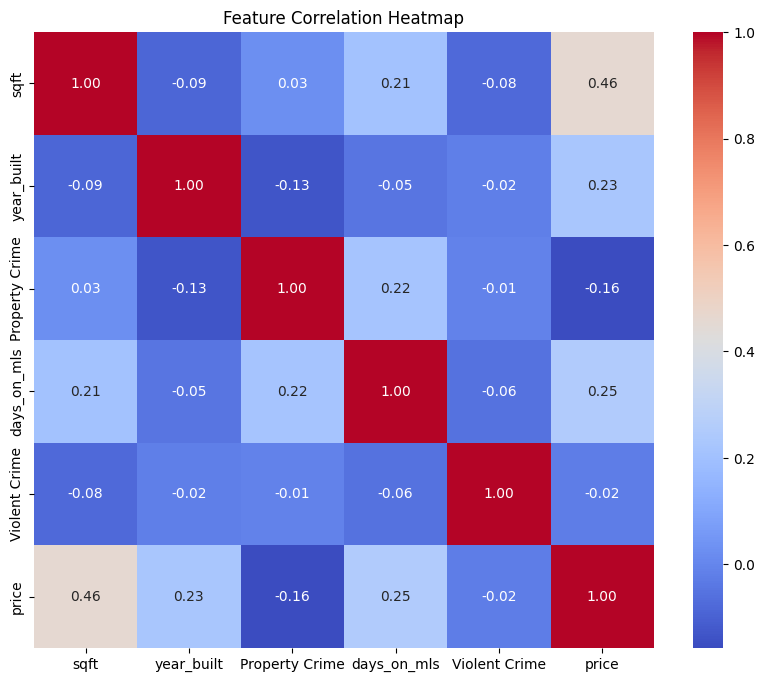

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['style', 'zip_code']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
df = data
df['style'] = df['style'].astype(str)
df['zip_code'] = df['zip_code'].astype(str)
# One-hot encode both 'style' and 'zip_code' columns
df_encoded = pd.get_dummies(df, columns=['style', 'zip_code'], drop_first=True)

# Split data into features and target
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
linmodel = LinearRegression()
linmodel.fit(X_train_scaled, y_train)

# Predict the target variable (price)
y_pred = linmodel.predict(X_test_scaled)

In [19]:
r2_score(y_test, y_pred)

0.584549633284442

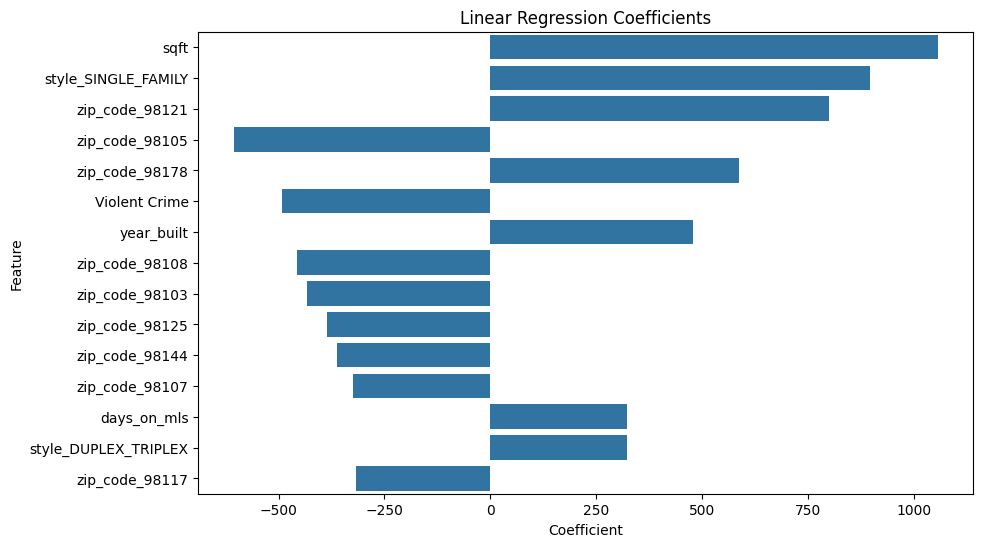

In [27]:
# Get feature names
feature_names = X.columns

# Get the model coefficients
coefficients = linmodel.coef_

# Create a DataFrame to display the features and their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to highlight most influential features
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False).head(15)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Linear Regression Coefficients')
plt.show()